In [300]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Tamilvanan\\Desktop\\Machine learning\\telecom_churn_data.csv')


In [301]:
#Importing Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# To split Train and Test
from sklearn.model_selection import train_test_split

# Model Building
import statsmodels.api as sm


In [302]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [303]:
df.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

In [304]:
len(df.columns)

226

In [305]:
# Checking the percentage of missing values
percent = round(100*(df.isnull().sum()/len(df.index)), 2) 

percent.sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [306]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [307]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [308]:
# Taking average of recharge amounts in good phase
df['total_rech_amt_67'] =( df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

In [309]:
# Taking 70th percentile 
df['total_rech_amt_67'].quantile(0.7)

368.5

In [310]:
# Filtering to get only those customers who recharged more than 70th percentile of average recharge in good phase
df = df.loc[df.total_rech_amt_67>=368.5]

In [311]:
len(df) 

30011

In [312]:
len(df.columns)

227

In [313]:
churn_attrib=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [314]:
x=df[churn_attrib]

In [315]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 4 columns):
total_ic_mou_9    30011 non-null float64
total_og_mou_9    30011 non-null float64
vol_2g_mb_9       30011 non-null float64
vol_3g_mb_9       30011 non-null float64
dtypes: float64(4)
memory usage: 1.1 MB


In [316]:
a=x['total_ic_mou_9']==0 
b= x['total_og_mou_9']==0
c=x['vol_2g_mb_9']==0
d=x['vol_3g_mb_9']==0

In [317]:
df['Churn']=a&b&c&d
df['Churn']

7         True
8        False
13       False
16       False
17       False
21       False
24       False
33       False
38       False
41       False
48       False
53       False
56       False
57       False
60       False
61       False
69       False
73       False
74       False
77       False
87       False
92       False
96       False
97        True
101      False
102      False
103      False
105      False
111       True
115      False
         ...  
99887     True
99893    False
99896    False
99899    False
99902    False
99904    False
99921    False
99922    False
99923    False
99924    False
99925    False
99927    False
99929    False
99931    False
99932    False
99935    False
99937    False
99939    False
99941    False
99943    False
99957    False
99959    False
99961     True
99963    False
99965    False
99970    False
99974    False
99986    False
99988    False
99997    False
Name: Churn, Length: 30011, dtype: bool

In [318]:
df['Churn']=df['Churn'].map(lambda x:1 if x else 0)

In [319]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
24        7001125315        109             0.0             0.0   
33        7000149764        109             0.0             0.0   
38        7000815202        109             0.0             0.0   
41        7000721289        109             0.0             0.0   
48        7000294396        109             0.0             0.0   
53        7002188521        109             0.0             0.0   
56        7002180748        109             0.0             0.0   
57        7001682585        109             0.0             0.0   
60        7000955945        109             0.0             0.0   
61        7000152517        109             0.0             0.0   
69        7002393996        109             0.0             0.0   
73        7002402996        109             0.0             0.0   
74        7001532600        109             0.0             0.0   
77        7001328263        109             0.0             0.0   
87        7001728145        109             0.0             0.0   
92        7001606600        109             0.0             0.0   
96        7001480390        109             0.0             0.0   
97        7000589828        109             0.0             0.0   
101       7001746121        109             0.0             0.0   
102       7001631060        109             0.0             0.0   
103       7002236431        109             0.0             0.0   
105       7000208415        109             0.0             0.0   
111       7001300706        109             0.0             0.0   
115       7001453769        109             0.0             0.0   
...              ...        ...             ...             ...   
99887     7001271496        109             0.0             0.0   
99893     7001438347        109             0.0             0.0   
99896     7002362186        109             0.0             0.0   
99899     7001632563        109             0.0             0.0   
99902     7002142544        109             0.0             0.0   
99904     7000649339        109             0.0             0.0   
99921     7000157295        109             0.0             0.0   
99922     7001602180        109             0.0             0.0   
99923     7000571771        109             0.0             0.0   
99924     7001581208        109             0.0             0.0   
99925     7000877443        109             0.0             0.0   
99927     7001570091        109             0.0             0.0   
99929     7002128793        109             0.0             0.0   
99931     7001904289        109             0.0             0.0   
99932     7000018772        109             0.0             0.0   
99935     7002109027        109             0.0             0.0   
99937     7000534033        109             0.0             0.0   
99939     7001631916        109             0.0             0.0   
99941     7002281862        109             0.0             0.0   
99943     7000899330        109             0.0             0.0   
99957     7002108597        109             0.0             0.0   
99959     7001792051        109             0.0             0.0   
99961     7000992757        109             0.0             0.0   
99963     7000484880        109             0.0             0.0   
99965     7000519799        109             0.0             0.0   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0       

In [320]:
#Remove all the date columns

df = df.drop(['last_date_of_month_6' , 'last_date_of_month_7' , 'last_date_of_month_8' , 'last_date_of_month_9' , 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' ], axis = 1)

In [321]:
len(df.columns)

216

In [322]:
# Removing all columns pertaining to churn phase as it is not needed for prediction 
df = df.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g'], axis = 1)

In [323]:
len(df.columns)

164

In [324]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

av_rech_amt_data_6    62.02
count_rech_3g_6       62.02
total_rech_data_6     62.02
fb_user_6             62.02
count_rech_2g_6       62.02
arpu_2g_6             62.02
night_pck_user_6      62.02
max_rech_data_6       62.02
arpu_3g_6             62.02
max_rech_data_7       61.14
arpu_3g_7             61.14
count_rech_3g_7       61.14
total_rech_data_7     61.14
arpu_2g_7             61.14
night_pck_user_7      61.14
fb_user_7             61.14
count_rech_2g_7       61.14
av_rech_amt_data_7    61.14
arpu_3g_8             60.83
max_rech_data_8       60.83
count_rech_2g_8       60.83
arpu_2g_8             60.83
av_rech_amt_data_8    60.83
total_rech_data_8     60.83
night_pck_user_8      60.83
fb_user_8             60.83
count_rech_3g_8       60.83
loc_ic_t2f_mou_8       3.13
loc_og_t2m_mou_8       3.13
loc_ic_mou_8           3.13
                      ...  
monthly_3g_8           0.00
sachet_3g_6            0.00
sachet_3g_7            0.00
sachet_3g_8            0.00
aon                 

In [325]:
# Find columns with more than 50% missing values:
miss_vals_col = df.columns[df.isnull().mean() >= 0.5]

print(miss_vals_col)


Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [326]:
df = df.drop(miss_vals_col,axis = 1)

In [327]:
print(len(df.columns))

137


In [328]:
# Checking the percentage of missing values
percent = round(100*(df.isnull().sum()/len(df.index)), 2) 

percent.sort_values(ascending=False)

std_og_t2t_mou_8      3.13
std_ic_t2t_mou_8      3.13
loc_og_t2c_mou_8      3.13
loc_og_mou_8          3.13
ic_others_8           3.13
isd_ic_mou_8          3.13
spl_ic_mou_8          3.13
std_ic_mou_8          3.13
std_ic_t2o_mou_8      3.13
std_ic_t2f_mou_8      3.13
std_ic_t2m_mou_8      3.13
loc_ic_mou_8          3.13
loc_og_t2m_mou_8      3.13
loc_ic_t2f_mou_8      3.13
loc_ic_t2m_mou_8      3.13
loc_ic_t2t_mou_8      3.13
std_og_t2m_mou_8      3.13
og_others_8           3.13
spl_og_mou_8          3.13
isd_og_mou_8          3.13
std_og_mou_8          3.13
std_og_t2c_mou_8      3.13
loc_og_t2f_mou_8      3.13
std_og_t2f_mou_8      3.13
roam_og_mou_8         3.13
loc_og_t2t_mou_8      3.13
offnet_mou_8          3.13
roam_ic_mou_8         3.13
onnet_mou_8           3.13
onnet_mou_6           1.05
                      ... 
monthly_3g_8          0.00
sachet_3g_6           0.00
sachet_3g_7           0.00
sachet_3g_8           0.00
aon                   0.00
aug_vbc_3g            0.00
j

In [329]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17          

In [330]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.001100e+04    30011.0         29897.0         29897.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846405e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29897.0  30011.000000  30011.000000  30011.000000  29695.000000   
mean              0.0    587.284404    589.135427    534.857433    299.184718   
std               0.0    442.722413    462.897814    492.259586    462.202367   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    364.161000    365.004500    289.609500     42.960000   
50%               0.0    495.682000    493.561000    452.091000    128.330000   
75%               0.0    703.922000    700.788000    671.150000    357.120000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000   
mean     307.447285    276.234168    422.380819    428.248096    387.121245   
std      483.244786    471.505518    471.096294    487.103204    480.279273   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       42.660000     32.210000    141.410000    139.587500    107.660000   
50%      127.950000    106.280000    285.960000    285.485000    251.360000   
75%      364.567500    309.980000    527.315000    536.827500    493.510000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29695.000000   29708.000000   29073.000000   29695.000000   
mean       17.598062      13.660030      13.683965      29.633675   
std        79.552216      76.679599      75.706579     119.160857   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29708.000000   29073.000000      29695.000000      29708.000000   
mean       22.260754      22.161948         95.688242         96.706103   
std        98.397962     107.874014        237.903645        249.205463   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.810000          9.590000   
50%         0.000000       0.000000         33.330000         33.870000   
75%         0.000000       0.000000         92.690000         92.495000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29073.000000      29695.000000      29708.000000      29073.000000   
mean          89.951446        183.208674        183.120362        172.998297   
std          237.947663        250.755724        241.245958        236.653042   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.230000         31.750000         35.130000         26.840000   
50%           30.830000        103.510000        106.140000         95.910000   
75%           87.540000        242.205000        241.000000        229.610000   
max        1075

In [331]:
# Removing those columns which have only zeros as its values
df = df.loc[:,~(df.columns.isin(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']))]

In [332]:
df.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_67', 'Churn'],
      dtype='object', length=128)

In [333]:
df

mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7         7000701601        109  1069.180  1349.850  3171.480        57.84   
8         7001524846        109   378.721   492.223   137.362       413.69   
13        7002191713        109   492.846   205.671   593.260       501.76   
16        7000875565        109   430.975   299.869   187.894        50.51   
17        7000187447        109   690.008    18.980    25.499      1185.91   
21        7002124215        109   514.453   597.753   637.760       102.41   
24        7001125315        109   422.050   359.730   354.793       124.19   
33        7000149764        109   977.020  2362.833   409.230         0.00   
38        7000815202        109   363.987   486.558   393.909       248.99   
41        7000721289        109   482.832   425.764   229.769        86.39   
48        7000294396        109  1873.271   575.927   179.218      2061.69   
53        7002188521        109   978.077  1141.296   706.020       135.14   
56        7002180748        109   452.624   320.548   368.807        34.46   
57        7001682585        109  1201.298   687.704   602.052        61.23   
60        7000955945        109   410.261   430.205   289.228        62.24   
61        7000152517        109   565.516   390.307   430.911       178.41   
69        7002393996        109   809.518   794.775    33.060       181.63   
73        7002402996        109  2401.829  1873.764   722.368      2020.84   
74        7001532600        109   324.449   382.389   350.360       381.23   
77        7001328263        109    30.000    82.378   674.950          NaN   
87        7001728145        109   623.635   712.818   560.995       162.68   
92        7001606600        109   465.794   530.596   463.903       178.46   
96        7001480390        109   676.999   786.560   377.488       113.24   
97        7000589828        109   374.863   294.023   183.043       433.59   
101       7001746121        109   512.524   402.001  1144.254       314.66   
102       7001631060        109   451.375   324.314   324.050        30.43   
103       7002236431        109   883.401  1082.027   759.027       253.98   
105       7000208415        109   659.587   398.875   621.127       995.39   
111       7001300706        109   596.301   146.073     0.000        55.19   
115       7001453769        109  1173.256   563.502   990.443        53.39   
...              ...        ...       ...       ...       ...          ...   
99887     7001271496        109   816.531   628.336   142.974       326.06   
99893     7001438347        109   547.602   398.135   408.193       326.14   
99896     7002362186        109   504.271   436.843   344.496       162.18   
99899     7001632563        109   976.749   777.884  1012.579       892.39   
99902     7002142544        109   441.209   316.964   313.691        59.13   
99904     7000649339        109   435.504   515.231   231.290       520.94   
99921     7000157295        109    79.066   511.262   393.454         8.88   
99922     7001602180        109   458.049   681.324   332.863         4.56   
99923     7000571771        109   919.526   777.112   813.973         7.79   
99924     7001581208        109   457.827   416.103   389.400       105.11   
99925     7000877443        109   137.643   905.596   718.777        74.08   
99927     7001570091        109   474.220   420.099   513.224        35.53   
99929     7002128793        109   418.140   766.583  1053.680        95.89   
99931     7001904289        109   897.341   176.181   468.485        22.38   
99932     7000018772        109   419.691   361.736   290.221       275.59   
99935     7002109027        109   552.795   267.650   531.254        94.31   
99937     7000534033        109   351.397   429.744   312.262       530.53   
99939     7001631916        109   398.308   834.643   203.506       553.84   
99941     7002281862        109   565.598   588.814   702.341       326.08   
99943     7000899330        1

In [334]:
# Taking those columns which still have null values
x=df.columns[df.isnull().sum()>0]
len(x)


81

In [335]:
# Imputing null values with zeros
df[x]=df[x].fillna(0)

In [336]:
df.isnull().sum().sort_values(ascending=False)

Churn                0
total_rech_amt_67    0
std_og_t2t_mou_7     0
std_og_t2t_mou_8     0
std_og_t2m_mou_6     0
std_og_t2m_mou_7     0
std_og_t2m_mou_8     0
std_og_t2f_mou_6     0
std_og_t2f_mou_7     0
std_og_t2f_mou_8     0
std_og_mou_6         0
std_og_mou_7         0
std_og_mou_8         0
isd_og_mou_6         0
isd_og_mou_7         0
isd_og_mou_8         0
spl_og_mou_6         0
spl_og_mou_7         0
spl_og_mou_8         0
og_others_6          0
og_others_7          0
og_others_8          0
total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
loc_ic_t2t_mou_6     0
loc_ic_t2t_mou_7     0
loc_ic_t2t_mou_8     0
loc_ic_t2m_mou_6     0
loc_ic_t2m_mou_7     0
                    ..
std_ic_mou_8         0
loc_ic_mou_7         0
loc_ic_mou_8         0
std_ic_t2t_mou_6     0
std_ic_t2t_mou_7     0
std_ic_t2t_mou_8     0
std_ic_t2m_mou_6     0
std_ic_t2m_mou_7     0
std_ic_t2m_mou_8     0
std_ic_t2f_mou_6     0
std_ic_t2f_mou_7     0
std_ic_t2f_mou_8     0
std_ic_mou_

### As seen above, there are no null values present anymore

In [337]:
df.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.001100e+04    30011.0  30011.000000  30011.000000  30011.000000   
mean    7.001223e+09      109.0    587.284404    589.135427    534.857433   
std     6.846405e+05        0.0    442.722413    462.897814    492.259586   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
25%     7.000641e+09      109.0    364.161000    365.004500    289.609500   
50%     7.001232e+09      109.0    495.682000    493.561000    452.091000   
75%     7.001814e+09      109.0    703.922000    700.788000    671.150000   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     296.034461    304.343206    267.600412    417.933372    423.924375   
std      460.775592    481.780488    466.560947    470.588583    486.525332   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       41.110000     40.950000     27.010000    137.335000    135.680000   
50%      125.830000    125.460000     99.440000    282.190000    281.940000   
75%      353.310000    359.925000    297.735000    523.125000    532.695000   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30011.000000   30011.000000   30011.000000    30011.00000   
mean     375.021691      17.412764      13.522114       13.25627   
std      477.489377      79.152657      76.303736       74.55207   
min        0.000000       0.000000       0.000000        0.00000   
25%       95.695000       0.000000       0.000000        0.00000   
50%      240.940000       0.000000       0.000000        0.00000   
75%      482.610000       0.000000       0.000000        0.00000   
max    14007.340000    2613.310000    3813.290000     4169.81000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   30011.000000   30011.000000   30011.000000      30011.000000   
mean       29.321648      22.036003      21.469272         94.680696   
std       118.570414      97.925249     106.244774        236.849265   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          8.320000   
50%         0.000000       0.000000       0.000000         32.590000   
75%         0.000000       0.000000       0.000000         91.460000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          95.729729         87.139995        181.279583        181.271524   
std          248.132623        234.721938        250.132066        240.722132   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.130000          5.790000         30.290000         33.580000   
50%           33.160000         28.640000        101.240000        104.340000   
75%           91.480000         84.670000        240.165000        239.485000   
max         7400.660000      10752.560000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      30011.000000       30011.00000      30011.000000      30011.000000   
mean         167.591199           6.97933          7.097268          6.494314   
std          234.862468          22.66552         22.588864         20.220028   
min            0.000000           0.00000          0.000000          0.000000   
25%           22.420000           0.00000          0.000000          0.000000   
50%           89.810000           0.33000          0.400000          0.160000   
75%          223.590000           5.09000 

In [338]:
# Renaming columns which has month name in it to maintain convention
df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### Deriving new features

In [339]:
#Getting columns excluding date columns
cols = df.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()


In [340]:
cols

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7

In [341]:
# Removing those columns which are not monthly metrics
cols.remove('aon')
cols.remove('Churn')
cols.remove('total_rech_amt_67')
cols.remove('mobile_number')
cols.remove('circle_id')

In [342]:
#Getting the columns names removing last two characters
sublist=[]

for col in cols:
    sublist.append(col[:-2])

In [343]:
# Removing the duplicates by converting it first to set and then converting back to list
x=set(sublist)
sublist=list(x)
sublist

['loc_og_t2t_mou',
 'total_ic_mou',
 'loc_ic_t2t_mou',
 'std_og_t2m_mou',
 'std_ic_t2m_mou',
 'loc_ic_t2m_mou',
 'og_others',
 'vol_2g_mb',
 'std_og_t2t_mou',
 'ic_others',
 'monthly_3g',
 'std_og_mou',
 'isd_og_mou',
 'isd_ic_mou',
 'std_ic_mou',
 'loc_og_t2c_mou',
 'std_og_t2f_mou',
 'monthly_2g',
 'loc_og_mou',
 'std_ic_t2f_mou',
 'sachet_3g',
 'last_day_rch_amt',
 'roam_og_mou',
 'vol_3g_mb',
 'spl_og_mou',
 'total_og_mou',
 'offnet_mou',
 'total_rech_amt',
 'loc_og_t2f_mou',
 'onnet_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'roam_ic_mou',
 'loc_ic_t2f_mou',
 'spl_ic_mou',
 'loc_og_t2m_mou',
 'arpu',
 'total_rech_num',
 'vbc_3g',
 'sachet_2g',
 'max_rech_amt']

In [344]:
sum_df=pd.DataFrame()
for col in sublist:
    sum_df['total_'+col] = df[col+'_6']+df[col+'_7']+df[col+'_8']

In [345]:
sum_df.head()

total_loc_og_t2t_mou  total_total_ic_mou  total_loc_ic_t2t_mou  \
7                 123.05             1613.24                117.71   
8                 527.21              148.89                 33.99   
13                 91.83             2285.72                128.04   
16                175.15             1040.88                141.66   
17                 38.99               94.19                 34.54   

    total_std_og_t2m_mou  total_std_ic_t2m_mou  total_loc_ic_t2m_mou  \
7                 130.79                359.76                560.24   
8                  99.42                 27.16                 87.04   
13                465.24                655.83                356.59   
16                105.79                165.69                526.66   
17                  1.55                  1.28                 49.72   

    total_og_others  total_vol_2g_mb  total_std_og_t2t_mou  total_ic_others  \
7              0.00             0.00                 39.60            46.07   
8              0.00           356.03                272.57             0.00   
13             0.00             0.02               1030.62           121.16   
16             0.00             0.00                 13.70             0.00   
17             0.93             0.00               1147.72             0.00   

    total_monthly_3g  total_std_og_mou  total_isd_og_mou  total_isd_ic_mou  \
7                  0            213.84             10.19             48.18   
8                  0            372.02              0.00              0.00   
13                 0           1495.89              1.29            700.78   
16                 0            119.51              0.00              0.23   
17                 0           1149.27              0.00              0.00   

    total_std_ic_mou  total_loc_og_t2c_mou  total_std_og_t2f_mou  \
7             547.56                  0.00                 43.42   
8              27.84                  7.15                  0.00   
13            966.31                  0.49                  0.00   
16            322.16                  0.00                  0.00   
17              9.91                  0.00                  0.00   

    total_monthly_2g  total_loc_og_mou  total_std_ic_t2f_mou  total_sachet_3g  \
7                  0           1211.86                108.64                0   
8                  1            729.31                  0.00                0   
13                 0            612.78                  1.91                0   
16                 0            737.48                  2.69                0   
17                 0             97.54                  0.00                0   

    total_last_day_rch_amt  total_roam_og_mou  total_vol_3g_mb  \
7                      779              74.39             0.00   
8                       60               0.00           762.89   
13                     160              44.68             0.00   
16                     330              17.74             0.00   
17                      30              21.80             0.00   

    total_spl_og_mou  total_total_og_mou  total_offnet_mou  \
7              11.00             1446.93           1346.50   
8              10.23             1111.58            311.77   
13              4.78             2114.76           1015.05   
16              9.17              866.20            688.79   
17              2.58             1250.34             67.18   

    total_total_rech_amt  total_loc_og_t2f_mou  total_onnet_mou  \
7                   6008                170.50           164.81   
8                   1158                  0.00           799.80   
13                  1477                 28.05          1144.39   
16                  1078                 14.74           195.13   
17                   846                  0.00          1202.98   

    total_loc_ic_mou  total_std_ic_t2t_mou  total_roam_ic_mou  \
7             971.15                 79.11              81.36   
8      

In [346]:
sum_df['in_out_difference']=sum_df['total_total_ic_mou']-sum_df['total_total_og_mou']

In [347]:
sum_df['onnet_offnet_difference'] = sum_df['total_onnet_mou']-sum_df['total_offnet_mou']

In [348]:
df2 = pd.concat([df,sum_df], axis=1)

In [349]:
df2.head()

mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7      7000701601        109  1069.180  1349.850  3171.480        57.84   
8      7001524846        109   378.721   492.223   137.362       413.69   
13     7002191713        109   492.846   205.671   593.260       501.76   
16     7000875565        109   430.975   299.869   187.894        50.51   
17     7000187447        109   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
13           1.44             49.63              6.19             36.01   
16           0.00             42.61             65.16             67.38   
17          13.34             38.99              0.00              0.00   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
13            151.13             47.28            294.46              4.54   
16            273.29            145.99            128.28              0.00   
17             58.54              0.00              0.00              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13              0.00             23.51               0.0               0.0   
16              4.48             10.26               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   
17              0.00         97.54          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   
17           1146.91              0.81              0.00              1.55   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
13             52.94            156.94              0.00              0.00   
16             64.51             18.29              0.

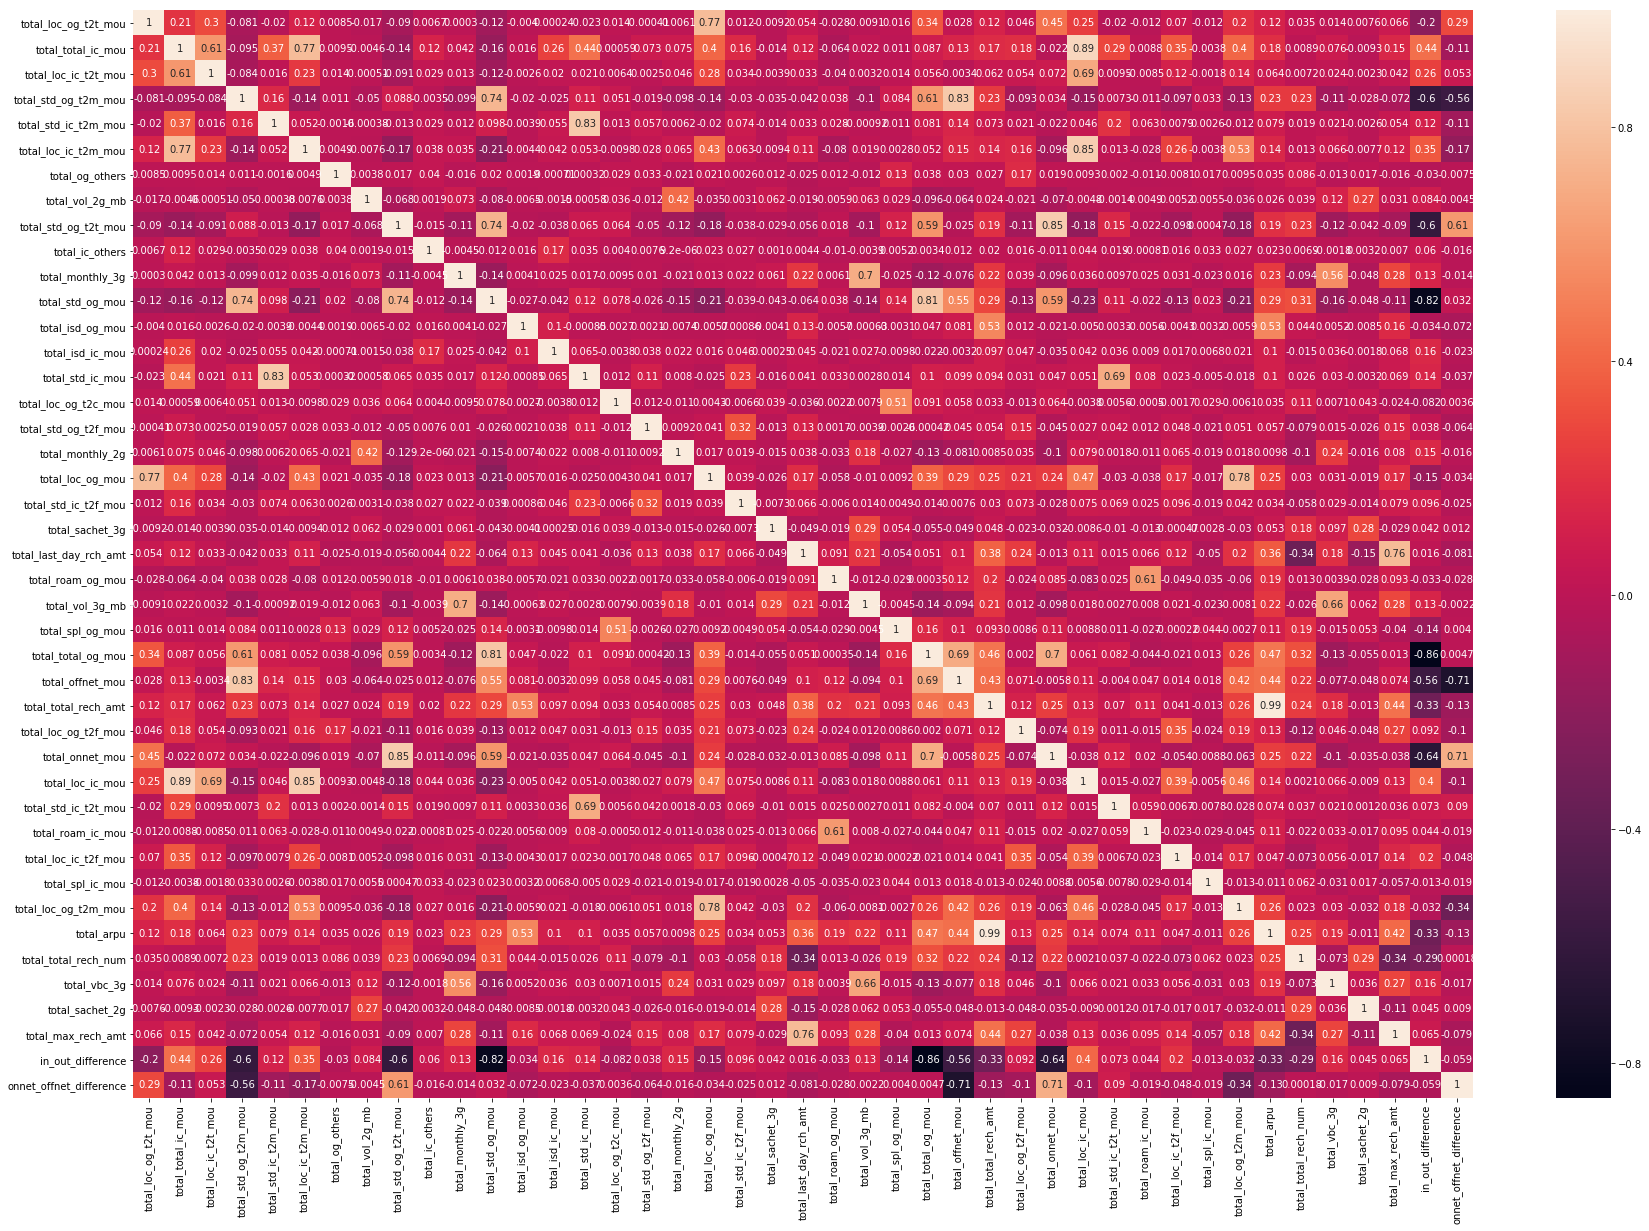

In [350]:
#Check correlation matrix

plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(sum_df.corr(),annot = True)
plt.show()

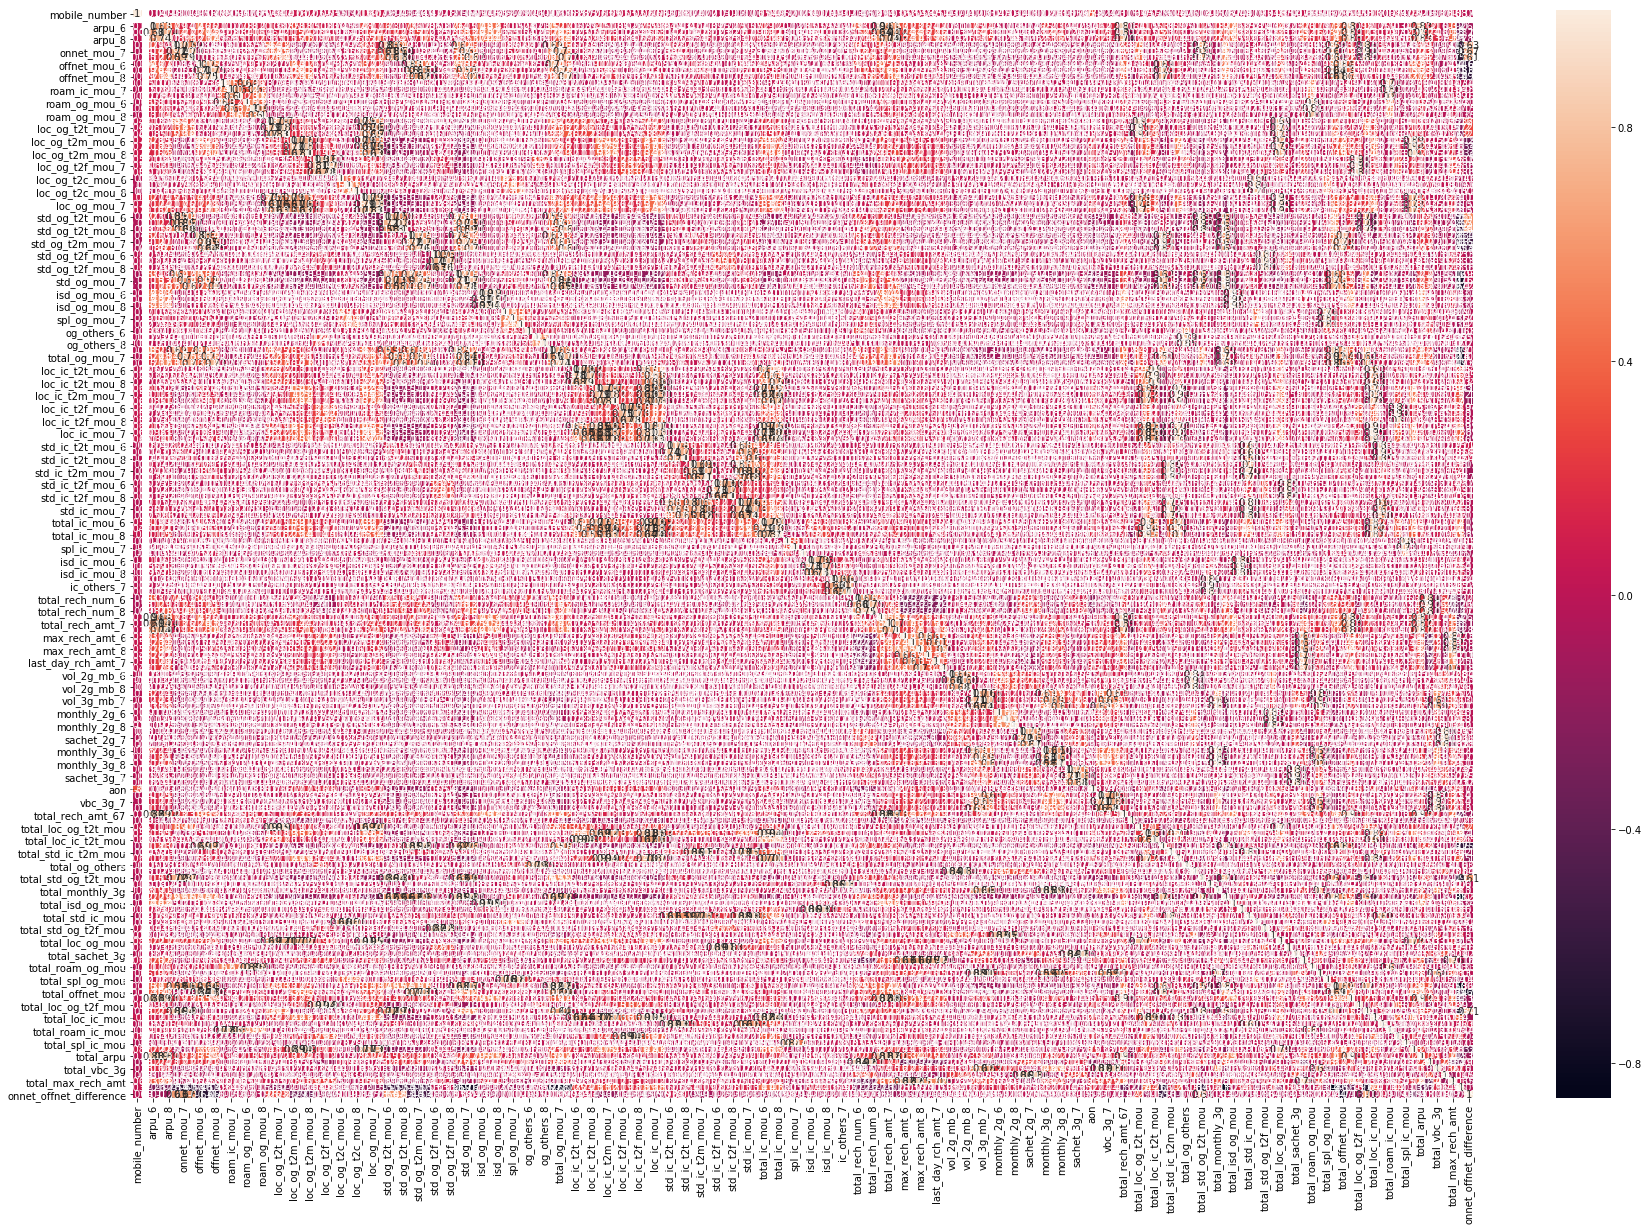

In [351]:
#Check correlation matrix

plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [352]:
from sklearn.model_selection import train_test_split

# Ensuring that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [359]:
y_train = df_train.pop('Churn')
X_train = df_train

In [360]:
df_train

mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
4715      7000476032        109   331.304   480.315   386.671       336.33   
15222     7002362029        109   320.013   508.681   480.398       110.08   
60145     7002395145        109   289.191   802.774   562.645        26.19   
62445     7001527400        109   491.912   570.752   544.894       177.03   
88349     7001867312        109   631.214   596.405   277.594       118.18   
71755     7001412933        109   418.468   395.226   426.763       148.56   
12269     7000221655        109   812.882   930.724   387.889       246.64   
60558     7001606255        109   325.992   862.299   869.391       142.24   
56742     7002019623        109   633.018   304.558   406.414        89.64   
16606     7001699302        109   284.796   675.367   606.996        10.54   
57675     7000576499        109   644.545   925.838   690.909       150.69   
40645     7000192800        109   411.301   413.786   255.538       641.44   
25426     7001621715        109   757.208   504.986   567.807        69.49   
35837     7001474998        109   270.579   450.073   403.696       186.34   
72282     7002042467        109   497.155   552.359   556.439       349.79   
20744     7001089281        109   632.257   492.874   453.136       386.56   
4669      7001156938        109   607.782   399.790   364.375      1049.93   
92265     7001418318        109   760.594   815.501  1149.114        49.11   
53623     7001372824        109   524.329   702.597   502.930        15.86   
67400     7001535117        109   264.904   419.553   281.786        69.01   
34304     7002278265        109  1108.854   446.631   436.046       263.31   
48782     7000935381        109   888.358   120.879   570.559      1450.03   
72325     7000878647        109   819.251   755.310   326.820       194.58   
95326     7000729288        109   569.503   459.271   720.803       587.39   
34291     7001326257        109   365.296   271.921   181.761       134.31   
8449      7000279681        109   347.604   362.474   307.934        19.48   
78793     7001308729        109   808.183   465.818   312.810      1438.43   
23541     7002350235        109  1024.652  1295.532  1455.080        27.71   
19375     7000127281        109   794.680   363.386   409.811      1450.74   
7414      7001834537        109   640.865   487.916  1103.972      1205.06   
...              ...        ...       ...       ...       ...          ...   
19091     7002052979        109   995.040   675.613   608.315      1087.54   
62894     7001231360        109   362.099   350.493   444.984       571.53   
20619     7000139933        109   439.024   550.367   388.847       721.66   
51553     7000812072        109   615.235   782.242   956.479       482.84   
19034     7002049016        109   642.164  1381.511   287.452        12.63   
32309     7001795592        109   477.610   704.608   324.894         4.46   
37083     7001875231        109   638.270   876.587   659.069       356.11   
25622     7000762807        109   333.370   314.381   211.824       175.01   
59193     7000753698        109   295.466   728.334   318.528         0.00   
88370     7000835464        109   501.828   347.206   234.732       276.51   
38179     7002126434        109  1450.732  1939.627  1542.157        72.53   
87628     7000189784        109   269.261   573.195   546.168        48.54   
69382     7000353724        109  1010.873  1263.722   386.959       358.71   
36568     7001904807        109   371.191   359.093   468.120       216.08   
44261     7000915791        109   585.563   523.357   622.106       207.21   
57343     7001189423        109   440.456   730.556   636.998        97.44   
18644     7000837987        109   509.273   311.274   236.035       218.08   
26198     7000345378        109   357.475   366.456   233.466        68.94   
46280     7001615165        109   573.414   365.528   599.599       367.14   
68612     7000725929        1

In [361]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

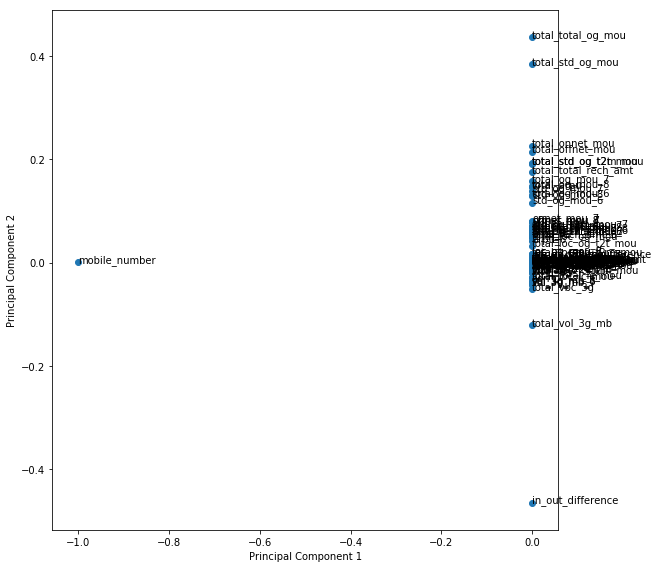

In [362]:
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

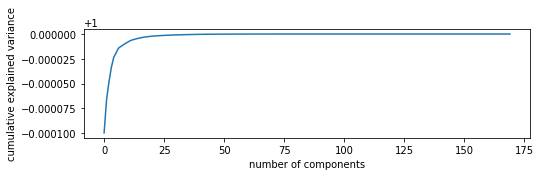

In [363]:
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [364]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [365]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 25)

In [375]:
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape


(9004, 25)

### Using Randomforests on PCA data

In [371]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

In [366]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

C:\Users\dsaip\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [367]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [372]:
print(classification_report(y_train,rfc.predict(df_train_pca)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19184
          1       1.00      0.89      0.94      1823

avg / total       0.99      0.99      0.99     21007



In [373]:
print(confusion_matrix(y_train,rfc.predict(df_train_pca)))


[[19184     0]
 [  200  1623]]


In [374]:
y_test = df_test.pop('Churn')
X_test = df_test

### Finding metrics on test data

In [377]:
print(classification_report(y_test,rfc.predict(df_test_pca)))

             precision    recall  f1-score   support

          0       0.91      1.00      0.96      8234
          1       1.00      0.00      0.01       770

avg / total       0.92      0.91      0.87      9004



In [378]:
print(confusion_matrix(y_test,rfc.predict(df_test_pca)))

[[8234    0]
 [ 767    3]]


In [379]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# selecting 5 folds
n_folds = 5
scoring = {'AUC': 'roc_auc'}

parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',verbose=1)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   46.9s finished


### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import statsmodels.api as sm  
# Add constant 
lm = LogisticRegression(class_weight='balanced')
rfe = RFE(lm, 80)                   # running RFE
rfe = rfe.fit(X_train, y_train)


In [ ]:
X_train_model = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
X_train_model = sm.add_constant(X_train_model)  
#Fit a binomial model
lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
lm_stats.summary()